In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn import preprocessing as preproc # load preprocessing function
import warnings
warnings.filterwarnings("ignore")
sns.set()
from sklearn import tree
from sklearn import ensemble
from sklearn import model_selection
from sklearn import linear_model

sns.set_theme()


In [64]:
df = pd.read_excel('data/Future Schedule.xlsx')
len(df.Destination.unique())

172

In [42]:
df_train = pd.read_csv("data/train_data.csv")
df_test = pd.read_csv("data/test_data.csv")


X = df_train.drop(['LoadFactor','ScheduleTime'], axis = 1)
X_test = df_test.drop(['ScheduleTime'], axis = 1)

y = df_train.LoadFactor






,SeatCapacity,Hour,Weekday,High_Season,Corona,Airline_5M,Airline_AP,Airline_AY,Airline_BJ,Airline_BT,...,US_Holiday_Juneteenth National Independence Day,US_Holiday_Juneteenth National Independence Day (Observed),US_Holiday_Labor Day,US_Holiday_Martin Luther King Jr. Day,US_Holiday_Memorial Day,US_Holiday_New Year's Day,US_Holiday_New Year's Day (Observed),US_Holiday_Thanksgiving,US_Holiday_Veterans Day,US_Holiday_Washington's Birthday
0,142,6,4,False,True,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,74,10,4,False,True,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,142,12,4,False,True,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,72,13,4,False,True,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,186,14,4,False,True,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39444,144,18,0,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39445,156,19,0,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39446,98,20,0,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39447,186,19,0,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
results = pd.read_csv('results/booster_CV3.csv')
opt = results[results.mean_test_score == results.mean_test_score.max()]
opt



,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
341,341,36.146475,0.170245,0.499031,0.019117,0.043714,7,100,700,"{'learning_rate': 0.04371428571428571, 'max_de...",-0.050241,-0.038226,-0.038479,-0.055273,-0.041206,-0.044685,0.00686,1


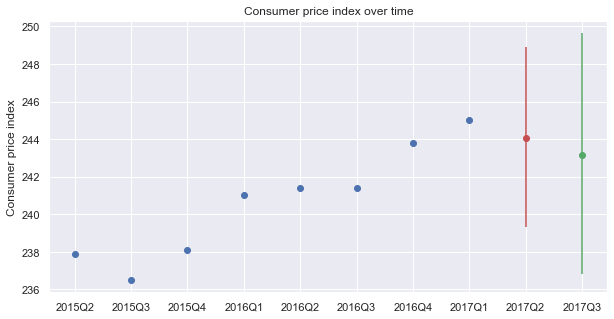

In [106]:
x = np.array([237.9, 236.5, 238.1, 241, 241.4, 241.4, 243.8, 245.0])
x_new = np.array([244.055, 243.1622])

fig,ax = plt.subplots(figsize = (10, 5))
ax.plot(x, 'o') 
ax.plot([8], x_new[0], 'o', c = 'r')#, c = ['red', 'orange'])
ax.plot([9], x_new[1], 'o', c = 'g')
ax.vlines([8],[239.3185], [ 248.8859], colors = 'r')
ax.vlines([9],[236.8342], [249.6594 ], colors = 'g')
ax.set_ylabel('Consumer price index')
ax.set_xticks(range(10))
ax.set_title('Consumer price index over time')
ax.set_xticklabels(['2015Q2', '2015Q3', '2015Q4' ,'2016Q1' ,'2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3']);






In [107]:
1.2334 == 1.2334

True

In [27]:
model = ensemble.GradientBoostingRegressor(max_depth = opt.param_max_depth.values[0],max_features = opt.param_max_features.values[0], n_estimators = opt.param_n_estimators.values[0], learning_rate =opt.param_learning_rate.values[0])
model.fit(X, y)

GradientBoostingRegressor(learning_rate=0.0437142857142857, max_depth=7,
                          max_features=100, n_estimators=700)

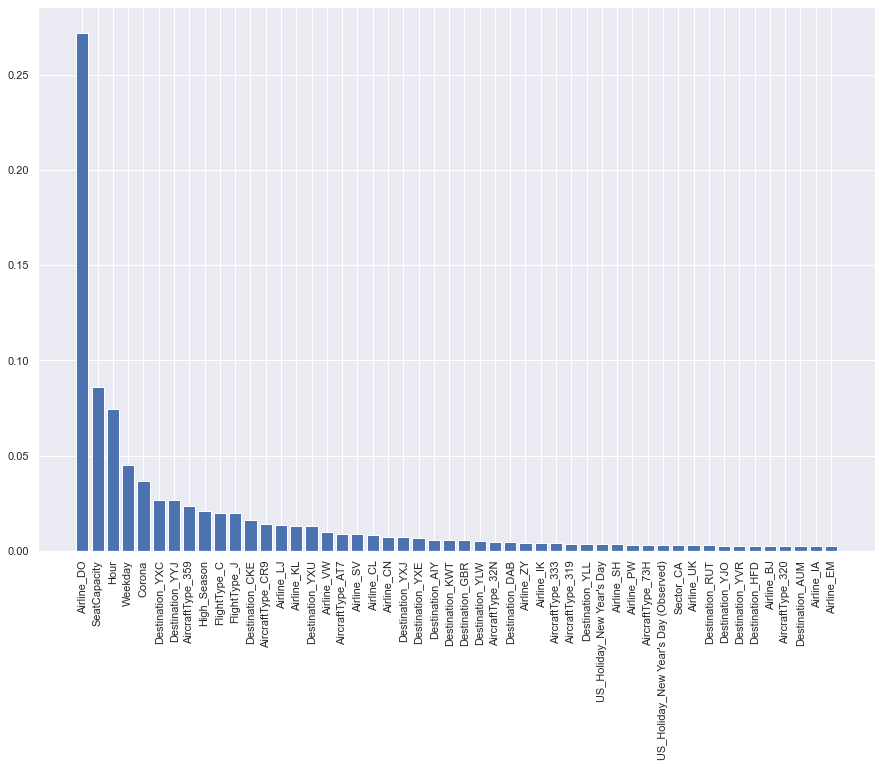

In [38]:
n = 50

idx = np.argsort(model.feature_importances_)[::-1]

importance = model.feature_importances_[idx[:n]]
names = X.columns[idx[:n]]

fig, ax = plt.subplots(1,1, figsize = (15,10))
ax.bar(range(n), importance)
ax.set_xticks(range(n))
ax.set_xticklabels(names, rotation = 90)
plt.show()



In [39]:
# grid search 

model = ensemble.GradientBoostingRegressor(max_depth = opt.param_max_depth.values[0],max_features = opt.param_max_features.values[0], n_estimators = opt.param_n_estimators.values[0], learning_rate =opt.param_learning_rate.values[0])

param_space = {}

grid = model_selection.GridSearchCV(model, param_grid= {}, n_jobs = -1, verbose=True, scoring='neg_mean_squared_error')

grid.fit(X_train, y)


print(results.mean_test_score.max(), grid.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
-0.0446849217079908 -0.04519826737809709


In [41]:
print(results.mean_test_score.max(), grid.best_score_)



-0.0446849217079908 -0.04519826737809709


In [56]:
from sklearn.model_selection import KFold

CV = KFold(5)

error = []
X_ = X[y !=0].reset_index(drop = 'index')
y_ = y[y !=0].reset_index(drop = 'index')
for train_idx, val_idx in CV.split(X_,y_):
    X_train, X_val = X_.loc[train_idx], X_.loc[val_idx]
    y_train, y_val = y_.loc[train_idx], y_.loc[val_idx]

    model = ensemble.GradientBoostingRegressor(max_depth = opt.param_max_depth.values[0],max_features = opt.param_max_features.values[0], n_estimators = opt.param_n_estimators.values[0], learning_rate =opt.param_learning_rate.values[0])

    model.fit(X_train, y_train)
    
    y_hat = model.predict(X_val)


    pred_no = X_val.SeatCapacity * y_hat
    true_no = X_val.SeatCapacity * y_val

    print(pred_no)
    print(true_no)
    print(y_val)
    print(y_hat)

    error.append(   (1- abs((true_no - pred_no)/true_no)).mean() )



0        45.716086
1        12.336444
2        42.661710
3        15.860669
4        49.643972
           ...    
7873     81.168687
7874     71.421091
7875    115.316638
7876    126.550460
7877    122.420780
Name: SeatCapacity, Length: 7878, dtype: float64
0        58.0
1        14.0
2        81.0
3        24.0
4        38.0
        ...  
7873     59.0
7874     35.0
7875    121.0
7876    147.0
7877    166.0
Length: 7878, dtype: float64
0       0.408451
1       0.189189
2       0.570423
3       0.333333
4       0.204301
          ...   
7873    0.393333
7874    0.194444
7875    0.672222
7876    0.777778
7877    0.878307
Name: LoadFactor, Length: 7878, dtype: float64
[0.32194427 0.1667087  0.30043458 ... 0.64064799 0.66957915 0.647729  ]
7878      29.668662
7879      91.505499
7880     198.595259
7881     130.025657
7882     124.233924
            ...    
15751     39.391759
15752     66.032700
15753     53.411701
15754     24.166886
15755     29.463087
Name: SeatCapacity, Length: 7878,

In [58]:
X.

0.36817157715355914

In [51]:
error

,SeatCapacity,Hour,Weekday,High_Season,Corona,Airline_5M,Airline_AP,Airline_AY,Airline_BJ,Airline_BT,...,US_Holiday_Juneteenth National Independence Day,US_Holiday_Juneteenth National Independence Day (Observed),US_Holiday_Labor Day,US_Holiday_Martin Luther King Jr. Day,US_Holiday_Memorial Day,US_Holiday_New Year's Day,US_Holiday_New Year's Day (Observed),US_Holiday_Thanksgiving,US_Holiday_Veterans Day,US_Holiday_Washington's Birthday
0,142,6,4,False,True,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,74,10,4,False,True,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,142,12,4,False,True,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,72,13,4,False,True,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,186,14,4,False,True,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39384,144,18,0,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39385,156,19,0,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39386,98,20,0,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39387,186,19,0,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
